### RADS 611 Advanced Machine learning
- **Parin Kittipongdaja**
- **RADS 6136454 RADS/M**
- **Assignment I: Adaptive Boosting**

# Introduction

<p style="text-indent: 2.5em;">
    <b>Ensemble learning</b> helps improve machine learning results by <u>combining several models</u>. This approach allows the production of better predictive performance compared to a single model. That is why ensemble methods placed first in many prestigious machine learning competitions, such as the Netflix Competition, KDD 2009, and Kaggle.

<p style="text-indent: 2.5em;">
<b>AdaBoost</b> (Adaptive Boosting) is one boosting algorithm (sequential methods) of <u>Ensemble methods</u> which are meta-algorithms that combine several machine learning techniques into one predictive model in order to converts weak learner to strong learners. Adaboost is an ensemble technique in which the predictors are not made independently, but sequentially.

<p style="text-indent: 2.5em;">
<i>AdaBoost</i> is an iterative procedure used to adaptively change the distribution of training examples so that the base classifiers will focus on examples that are hard to classify. Unlike bagging, boosting assigns a weight to each traning example and may adaptively change the weight at the end of each boosting round. 
    
> The weights asigned to the training examples can be used in the following ways:
> 1. They can be used as a sampling distribution to draw a set of boostrap samples from the original data
> 2. They can be used by the base classifier to learn a model that is biased toward higher-weight examples

<p style="text-indent: 2.5em;">
<i>Boosting</i> in general decreases the bias error and builds strong predictive models. Boosting has shown better predictive accuracy than bagging, but it also tends to over-fit the training data as well.Thus, parameter tuning becomes a crucial part of boosting algorithms to make them avoid overfitting.
    
<img src="./img/adaboost4.png" alt="Drawing" style="width: 500px;"/>

# Adaboost Algorithm
Two main modifications in Adaboost Algorithm
1. Instead of a random sample of the training data, use a weighted sample to focus on most difficult examples
- Instead of combining classifiers with equal vote, use a weighted vote

<img src="./img/adaboost3.png" alt="Drawing" style="width: 600px;"/>


# <u><center> Let's conduct the experiment </center></u>
<p style="text-indent: 2.5em;">
    In this experiment, we will develop a model from Adaptive boosting classifier in order to compare its performance in term of accuracy, sensitivity, specificity with the classifier(Decision tree and Support vector machine). We will use example#3 and example#4 to develop a model with hyper-parameter tuning and then measure model performance with itself(training dataset) and random sampling 50% from example#4 (testing dataset).


# Table of Contents
1. [Chapter 1 - Install Neccessary Library](#ch1)
1. [Chapter 2 - Check Version of Library](#ch2)
1. [Chapter 3 - Importing Required Libraries](#ch3)
1. [Chapter 4 - Define development function](#ch4)
1. [Chapter 5 - Define Evaluation and Report Function](#ch5)
1. [Chapter 6 - Step 1: Importing Required Libraries](#ch6)
1. [Chapter 7 - Step 2: Importing Dataset](#ch7)
1. [Chapter 8 - Step 3: Data Exploration Evaluate Model Performance](#ch8)
1. [Chapter 9 - Step 4: Tune Model with Hyper-Parameters](#ch9)
1. [Chapter 10 - Step 5: Evaluate Model Performance](#ch10)
1. [Chapter 11 - Random case by using 50% of example#4 data set](#ch11)
1. [Chapter 12 - Conclusion and Step 6: Optimize and Strategize](#ch12)
1. [Reference](#ch90)

<a id="ch1"></a>
# Install Neccessary Library

<a id="ch2"></a>
# Check Version of Library

In [1]:
import sys
import numpy as np
import matplotlib
import seaborn as sns
import tqdm
import sklearn
import pandas


print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "Matplotlib", matplotlib.__version__ )
print ( "Seaborn", sns.__version__ )
print ( "tqdm", tqdm.__version__ )
print ( "scikit-learn", sklearn.__version__ )
print ( "pandas", pandas.__version__ )

Python 3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]
Numpy 1.15.4
Matplotlib 3.0.3
Seaborn 0.9.0
tqdm 4.31.1
scikit-learn 0.21.0
pandas 0.24.2


<a id="ch3"></a>
# Importing Required Libraries

In [2]:
# Basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import seaborn as sns
from itertools import cycle
Fignum = cycle(range(1,50))

# Tune and Develop Model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report 

# Set dataframe display

In [3]:
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # True
pd.set_option('display.max_colwidth', -1) # 50

<a id="ch4"></a>
# Define development function

### 1. Adaboost + Decsion tree classifier

In [4]:
# Adaboosting classifier with base decision tree classifier for hyper paramter tuning
def ADA_DT(X, y, verbose = 0):
    param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__max_depth" : np.arange(1,9),
                  "n_estimators": np.arange(1,11,1)
                 }

    DT = DecisionTreeClassifier(random_state = rs)
    ABC_DT = AdaBoostClassifier(base_estimator = DT, random_state=rs)
    
    gs = GridSearchCV(estimator=ABC_DT, 
                       param_grid=param_grid,
                       refit=True,
                       scoring=score_param,
                       cv=LOO,
                       n_jobs=-1, 
                       iid=True)
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return gs

### 2. Adaboost + Support Vector Machine

In [5]:
# Adaboosting classifier with base support vector machine for hyper paramter tuning
def ADA_SVM(X, y, verbose = 0):
    param_grid = {'base_estimator__C' : np.logspace(-5,2,num=5),
              'base_estimator__gamma' : np.logspace(-5,2,num=5),
              'base_estimator__kernel' : ['sigmoid', 'rbf','linear','poly'],
              'n_estimators': np.arange(1,11,1)
                 }

    SVM = SVC(probability=True, random_state=rs)
    ABC_SVM = AdaBoostClassifier(base_estimator = SVM, random_state=rs)
    
    gs = GridSearchCV(estimator=ABC_SVM, 
                       param_grid=param_grid,
                       refit=True,
                       scoring=score_param,
                       cv=LOO,
                       n_jobs=-1, 
                       iid=True)   
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return gs

<a id="ch5"></a>
# Define Evaluation and Report Function

In [6]:
# Make a model summary report
def model_report(X_test,y_test,GridSearchCV_List):

    model_list = []
    accuracy_list = []
    auc_list = []
    cm_list = []
    specificity_list = []
    sensitivity_list = []
    recall_list = []
    precision_list = []
    ap_list = []
    f1_list = []
    best_params_list = []
    
    for i in GridSearchCV_List:
        
        model_name = i
        y_pred = eval(i+'.best_estimator_.predict(X_test)')
        P_true = eval(i+'.predict_proba(X_test)[:, 1]')
        TP, FN, FP, TN = confusion_matrix(y_test, y_pred, labels=[1, -1]).ravel()
        Accuracy = round(accuracy_score(y_test, y_pred), 2)
        auc = round(roc_auc_score(y_test, P_true), 2)
        cm = dict(TP=TP, FN=FN, FP=FP, TN=TN)
        Specificity = TN / (FP + TN)
        Sensitivity = TP / (TP + FN)
        Recall = round(recall_score(y_test, y_pred, average='binary'), 2)
        Precision = round(precision_score(y_test, y_pred, average='binary'), 2)
        ap = round(average_precision_score(y_test, P_true, pos_label=1), 2)
        F1_score = round(f1_score(y_test, y_pred,average='binary'), 2)
        best_params = eval(i+'.best_params_')
        
        model_list.append(model_name)
        accuracy_list.append(Accuracy)
        auc_list.append(auc)
        cm_list.append(cm)
        sensitivity_list.append(Sensitivity)
        specificity_list.append(Specificity)
        recall_list.append(Recall)
        precision_list.append(Precision)
        ap_list.append(ap)
        f1_list.append(F1_score)
        best_params_list.append(best_params)
        

    report = dict(Model = model_list,
                  Accuracy = accuracy_list,
                  AUC = auc_list,
                  Confusion_Matrix = cm_list,
                  Specificity = specificity_list,
                  Sensitivity = sensitivity_list,
                  Recall = recall_list,
                  Precision = precision_list,
                  Average_Precision = ap_list,
                  F1_score = f1_list,
                  Best_Parameters = best_params_list )
    
    df_report = pd.DataFrame.from_dict(report)
    pd.set_option('display.max_colwidth', -1)
    
    return df_report

<a id="ch6"></a>
# 1. Importing Required Libraries
- (Already import from above)

<a id="ch7"></a>
# 2. Importing Dataset
- Supervised learning datasets.
- Datasets is example#3 and example#4.
- File name are 'example03-data.csv', 'example03-class.csv', 'example04-data.csv' and 'example04-class.csv'

In [7]:
X3 = pd.read_csv('./data/example03-data.csv', sep=',',header=None, names=['gene#'+str(i) for i in range(1,11)])
y3 = pd.read_csv('./data/example03-class.csv', header=None, names=['Class']) 
df_ex3 = pd.concat([X3, y3], axis=1)

In [8]:
X4 = pd.read_csv('./data/example04-data.csv', sep=',',header=None, names=['gene#'+str(i) for i in range(1,11)])
y4 = pd.read_csv('./data/example04-class.csv', header=None, names=['Class']) 
df_ex4 = pd.concat([X4, y4], axis=1)

<a id="ch8"></a>
# 3. Data Exploration

In [9]:
# Declare list to store figure and figure name
figure_list = []
figure_name = []

### Example#3

In [10]:
df_ex3

,gene#1,gene#2,gene#3,gene#4,gene#5,gene#6,gene#7,gene#8,gene#9,gene#10,Class
0,0.61811,-3.47180,1.10873,2.46791,-1.91950,3.13381,-2.13840,3.16302,0.88690,2.10198,-1
1,0.03909,1.00244,0.05799,-1.42580,-3.11880,-1.41510,0.99909,-0.24200,-2.81550,0.30095,-1
2,1.98833,1.81363,1.70024,-0.09580,-1.21910,-0.93980,-3.43520,-0.04840,1.82415,2.52397,-1
3,-3.70380,-2.33620,-0.07200,-2.49270,0.66688,0.26892,-0.26020,2.80245,-3.15890,-3.84660,-1
4,-2.03000,1.28823,3.30172,3.99578,-2.98790,-0.98750,3.79946,1.52781,-2.11530,0.85804,-1
5,0.49419,1.85061,-0.73380,2.42972,-3.62450,3.36268,-3.52750,1.66426,3.27528,-0.39570,1
6,2.45254,3.86780,-1.86140,3.39461,-2.86390,2.69489,-3.01060,1.19967,2.92827,-0.58180,1
7,3.19071,2.21952,-0.47150,3.81537,-3.09620,2.47922,-3.82930,1.75655,2.34853,-0.29600,1
8,3.91947,2.52824,-3.92630,2.28796,-2.31690,3.94317,0.86533,-0.48310,1.20581,2.04839,1
9,3.90078,0.36807,2.15075,3.70445,-3.33850,2.40207,3.61672,2.28677,1.67847,1.99056,1


In [11]:
df_ex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
gene#1     10 non-null float64
gene#2     10 non-null float64
gene#3     10 non-null float64
gene#4     10 non-null float64
gene#5     10 non-null float64
gene#6     10 non-null float64
gene#7     10 non-null float64
gene#8     10 non-null float64
gene#9     10 non-null float64
gene#10    10 non-null float64
Class      10 non-null int64
dtypes: float64(10), int64(1)
memory usage: 960.0 bytes


In [12]:
df_ex3.describe()

,gene#1,gene#2,gene#3,gene#4,gene#5,gene#6,gene#7,gene#8,gene#9,gene#10,Class
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.086942,0.913054,0.125443,1.808150,-2.381842,1.494236,-0.692060,1.362703,0.605771,0.470379,0.000000
std,2.524982,2.235238,2.085393,2.322836,1.290011,2.040198,2.926614,1.266714,2.401707,1.913119,1.054093
min,-3.703800,-3.471800,-3.926300,-2.492700,-3.624500,-1.415100,-3.829300,-0.483100,-3.158900,-3.846600,-1.000000
25%,0.152865,0.526663,-0.668225,0.500140,-3.113150,-0.637620,-3.329050,0.263618,-1.364750,-0.370775,-1.000000
50%,1.303220,1.550930,-0.007005,2.448815,-2.925900,2.440645,-1.199300,1.596035,1.442140,0.579495,0.000000
75%,3.006168,2.127293,1.552363,3.626990,-2.018850,3.024080,0.965650,2.154215,2.217435,2.033933,1.000000
max,3.919470,3.867800,3.301720,3.995780,0.666880,3.943170,3.799460,3.163020,3.275280,2.523970,1.000000


 1    5
-1    5
Name: Class, dtype: int64

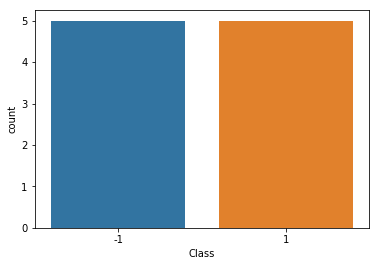

In [13]:
display(df_ex3.iloc[:,-1].value_counts())
display(sns.countplot(df_ex3.iloc[:,-1]))

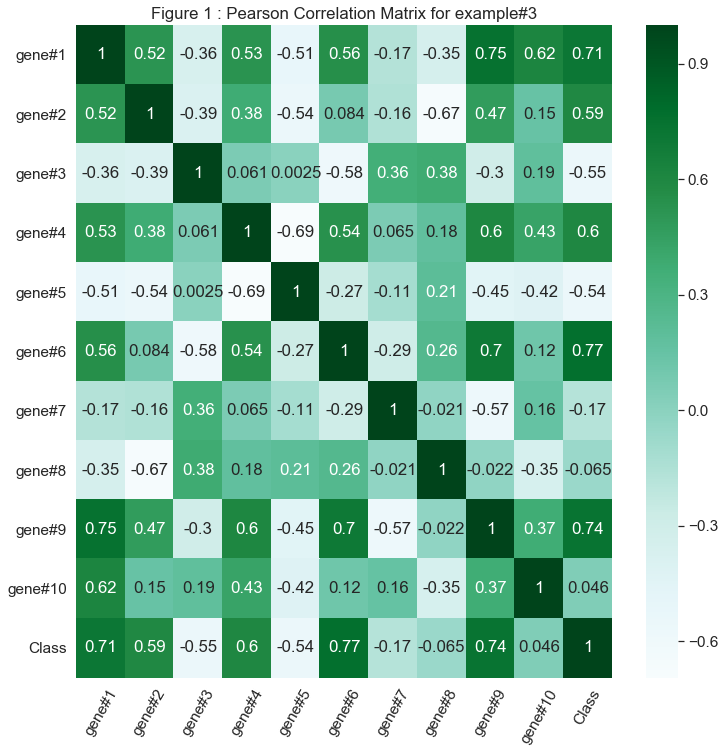

In [14]:
plt.figure(figsize=(12,12)) 
sns.set(font_scale=1.4)
title = 'Figure '+str(next(Fignum))+' : Pearson Correlation Matrix for example#3'
plt.title(title)
ax = sns.heatmap(df_ex3.corr(), annot=True, cmap='BuGn')
plt.xticks(rotation=60);

figure_list.append(ax.get_figure())
figure_name.append(title)

### Example#4

In [15]:
df_ex4

,gene#1,gene#2,gene#3,gene#4,gene#5,gene#6,gene#7,gene#8,gene#9,gene#10,Class
0,0.61811,-3.47180,1.10873,2.46791,-1.91950,3.13381,-2.13840,3.16302,0.88690,2.10198,-1
1,0.03909,1.00244,0.05799,-1.42580,-3.11880,-1.41510,0.99909,-0.24200,-2.81550,0.30095,1
2,1.98833,1.81363,1.70024,-0.09580,-1.21910,-0.93980,-3.43520,-0.04840,1.82415,2.52397,-1
3,-3.70380,-2.33620,-0.07200,-2.49270,0.66688,0.26892,-0.26020,2.80245,-3.15890,-3.84660,1
4,-2.03000,1.28823,3.30172,3.99578,-2.98790,-0.98750,3.79946,1.52781,-2.11530,0.85804,-1
5,0.49419,1.85061,-0.73380,2.42972,-3.62450,3.36268,-3.52750,1.66426,3.27528,-0.39570,1
6,2.45254,3.86780,-1.86140,3.39461,-2.86390,2.69489,-3.01060,1.19967,2.92827,-0.58180,-1
7,3.19071,2.21952,-0.47150,3.81537,-3.09620,2.47922,-3.82930,1.75655,2.34853,-0.29600,1
8,3.91947,2.52824,-3.92630,2.28796,-2.31690,3.94317,0.86533,-0.48310,1.20581,2.04839,-1
9,3.90078,0.36807,2.15075,3.70445,-3.33850,2.40207,3.61672,2.28677,1.67847,1.99056,1


In [16]:
df_ex4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
gene#1     10 non-null float64
gene#2     10 non-null float64
gene#3     10 non-null float64
gene#4     10 non-null float64
gene#5     10 non-null float64
gene#6     10 non-null float64
gene#7     10 non-null float64
gene#8     10 non-null float64
gene#9     10 non-null float64
gene#10    10 non-null float64
Class      10 non-null int64
dtypes: float64(10), int64(1)
memory usage: 960.0 bytes


In [17]:
df_ex4.describe()

,gene#1,gene#2,gene#3,gene#4,gene#5,gene#6,gene#7,gene#8,gene#9,gene#10,Class
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.086942,0.913054,0.125443,1.808150,-2.381842,1.494236,-0.692060,1.362703,0.605771,0.470379,0.000000
std,2.524982,2.235238,2.085393,2.322836,1.290011,2.040198,2.926614,1.266714,2.401707,1.913119,1.054093
min,-3.703800,-3.471800,-3.926300,-2.492700,-3.624500,-1.415100,-3.829300,-0.483100,-3.158900,-3.846600,-1.000000
25%,0.152865,0.526663,-0.668225,0.500140,-3.113150,-0.637620,-3.329050,0.263618,-1.364750,-0.370775,-1.000000
50%,1.303220,1.550930,-0.007005,2.448815,-2.925900,2.440645,-1.199300,1.596035,1.442140,0.579495,0.000000
75%,3.006168,2.127293,1.552363,3.626990,-2.018850,3.024080,0.965650,2.154215,2.217435,2.033933,1.000000
max,3.919470,3.867800,3.301720,3.995780,0.666880,3.943170,3.799460,3.163020,3.275280,2.523970,1.000000


 1    5
-1    5
Name: Class, dtype: int64

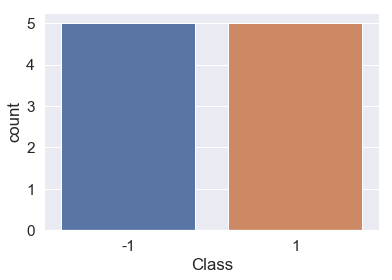

In [18]:
display(df_ex4.iloc[:,-1].value_counts())
display(sns.countplot(df_ex4.iloc[:,-1]))

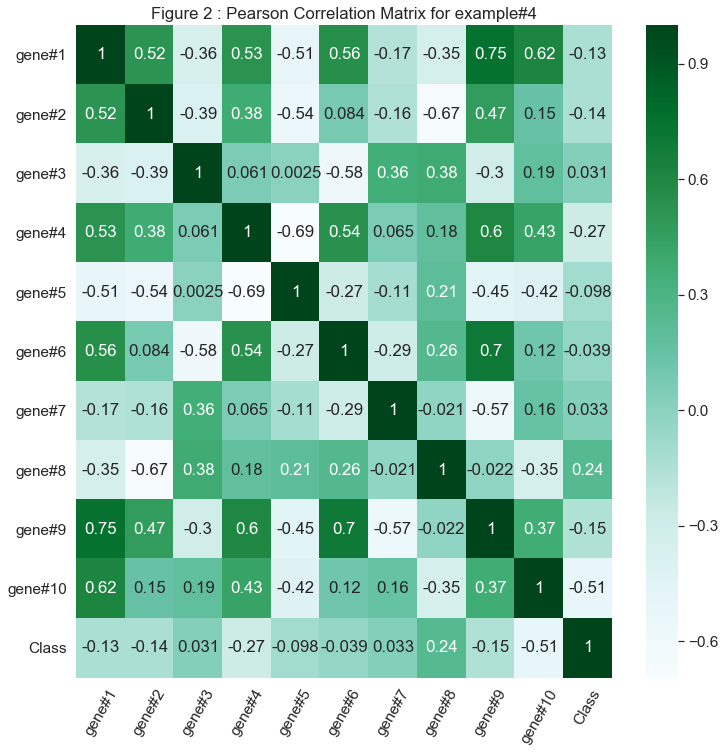

In [19]:
plt.figure(figsize=(12,12)) 
sns.set(font_scale=1.4)
title = 'Figure '+str(next(Fignum))+' : Pearson Correlation Matrix for example#4'
plt.title(title)
ax = sns.heatmap(df_ex4.corr(), annot=True, cmap='BuGn')
plt.xticks(rotation=60);

figure_list.append(ax.get_figure())
figure_name.append(title)

<a id="ch9"></a>
# 4. Tune Model with Hyper-Parameters
- Adaptive Boosting & Decision Tree
- Adaptive Boosting & Support Vector Machine

## Set parameter for tuning

In [20]:
score_param = 'accuracy'
LOO = LeaveOneOut()
rs = 29  # random state number
# cv = 3

### Tuning Model
- Training and hyperparameter tunining model

### Example 3

In [21]:
X3 = np.asarray(X3)
y3 = np.asarray(y3).ravel()
class_names = ['Positive', 'Negative'] 

In [22]:
print('Hyper parameter tuning in example 3')
print('AdaBoostClassifier with DecisionTreeClassifier')
gs_DT_ex3 = ADA_DT(X3, y3, verbose = 1)
print('AdaBoostClassifier with Support vector machine')
gs_SVM_ex3 = ADA_SVM(X3, y3, verbose = 1)

Hyper parameter tuning in example 3
AdaBoostClassifier with DecisionTreeClassifier
GridSearchCV took 3.24 seconds for 160 candidate parameter settings.
AdaBoostClassifier with Support vector machine
GridSearchCV took 27.45 seconds for 1000 candidate parameter settings.


### Example 4

In [23]:
X4 = np.asarray(X4)
y4 = np.asarray(y4).ravel()
class_names = ['Positive', 'Negative'] 

In [24]:
print('Hyper parameter tuning in example 4')
print('AdaBoostClassifier with DecisionTreeClassifier')
gs_DT_ex4 = ADA_DT(X4, y4, verbose = 1)
print('AdaBoostClassifier with Support vector machine')
gs_SVM_ex4 = ADA_SVM(X4, y4, verbose = 1)

Hyper parameter tuning in example 4
AdaBoostClassifier with DecisionTreeClassifier
GridSearchCV took 2.69 seconds for 160 candidate parameter settings.
AdaBoostClassifier with Support vector machine
GridSearchCV took 45.83 seconds for 1000 candidate parameter settings.


### List all experiment model from GridSearchCV

In [25]:
GridSearchCV_List = ['gs_DT_ex3', 'gs_SVM_ex3', 'gs_DT_ex4', 'gs_SVM_ex4']

<a id="ch10"></a>
# 5. Evaluate Model Performance
- Accuracy
- Confusion Matrix
- Specificity
- Sensitivity

### Test and Report all mode for training data
- Training data: Example#3 , Example#4
- Test Model
- Make summary report

In [26]:
# Measure performance by using their each own data
df_report3 = model_report(X3, y3, GridSearchCV_List[:2])
df_report4 = model_report(X4, y4, GridSearchCV_List[2:])
df_report_all = pd.DataFrame()
df_report_all = df_report_all.append([df_report3,df_report4], ignore_index=True)
df_report_all

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Accuracy,AUC,Confusion_Matrix,Specificity,Sensitivity,Recall,Precision,Average_Precision,F1_score,Best_Parameters
0,gs_DT_ex3,0.9,0.9,"{'TP': 4, 'FN': 1, 'FP': 0, 'TN': 5}",1.0,0.8,0.8,1.0,0.9,0.89,"{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'n_estimators': 1}"
1,gs_SVM_ex3,0.5,0.5,"{'TP': 0, 'FN': 5, 'FP': 0, 'TN': 5}",1.0,0.0,0.0,0.0,0.5,0.00,"{'base_estimator__C': 1e-05, 'base_estimator__gamma': 1e-05, 'base_estimator__kernel': 'sigmoid', 'n_estimators': 1}"
2,gs_DT_ex4,0.9,0.9,"{'TP': 4, 'FN': 1, 'FP': 0, 'TN': 5}",1.0,0.8,0.8,1.0,0.9,0.89,"{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'n_estimators': 1}"
3,gs_SVM_ex4,0.5,0.5,"{'TP': 0, 'FN': 5, 'FP': 0, 'TN': 5}",1.0,0.0,0.0,0.0,0.5,0.00,"{'base_estimator__C': 1e-05, 'base_estimator__gamma': 1e-05, 'base_estimator__kernel': 'sigmoid', 'n_estimators': 1}"


### Plot chart to compare model performance of training data
- Accuracy
- Sensitivity
- Specificity

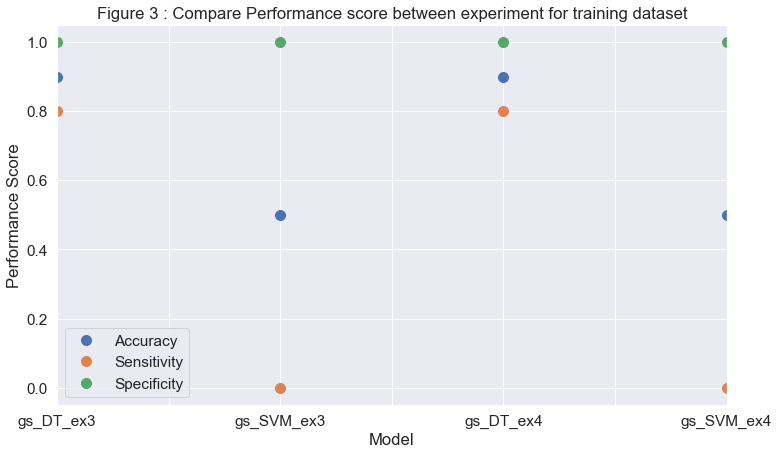

In [27]:
# Figure : Compare Performance score between experiment in each model
title = 'Figure '+str(next(Fignum))+' : Compare Performance score between experiment for training dataset'
df_plot = df_report_all.copy()
df_plot.set_index('Model', inplace=True)
ax = df_plot.loc[:,['Accuracy','Sensitivity','Specificity']].plot(legend=True,figsize= (12,7),grid = True, 
                                               marker='.', markersize=20,
                                               linestyle='none', title = title );

ax.set_ylabel("Performance Score");

figure_list.append(ax.get_figure())
figure_name.append(title)

<a id="ch11"></a>
## Random case by using 50% of example#4 data set

In [28]:
# Set seed number to always get the same result
np.random.seed(rs)
df_ex4

,gene#1,gene#2,gene#3,gene#4,gene#5,gene#6,gene#7,gene#8,gene#9,gene#10,Class
0,0.61811,-3.47180,1.10873,2.46791,-1.91950,3.13381,-2.13840,3.16302,0.88690,2.10198,-1
1,0.03909,1.00244,0.05799,-1.42580,-3.11880,-1.41510,0.99909,-0.24200,-2.81550,0.30095,1
2,1.98833,1.81363,1.70024,-0.09580,-1.21910,-0.93980,-3.43520,-0.04840,1.82415,2.52397,-1
3,-3.70380,-2.33620,-0.07200,-2.49270,0.66688,0.26892,-0.26020,2.80245,-3.15890,-3.84660,1
4,-2.03000,1.28823,3.30172,3.99578,-2.98790,-0.98750,3.79946,1.52781,-2.11530,0.85804,-1
5,0.49419,1.85061,-0.73380,2.42972,-3.62450,3.36268,-3.52750,1.66426,3.27528,-0.39570,1
6,2.45254,3.86780,-1.86140,3.39461,-2.86390,2.69489,-3.01060,1.19967,2.92827,-0.58180,-1
7,3.19071,2.21952,-0.47150,3.81537,-3.09620,2.47922,-3.82930,1.75655,2.34853,-0.29600,1
8,3.91947,2.52824,-3.92630,2.28796,-2.31690,3.94317,0.86533,-0.48310,1.20581,2.04839,-1
9,3.90078,0.36807,2.15075,3.70445,-3.33850,2.40207,3.61672,2.28677,1.67847,1.99056,1


In [29]:
# Sampling data 50% to be testing data from example#4
df_ex4_sam = df_ex4.sample(5)
df_ex4_sam

,gene#1,gene#2,gene#3,gene#4,gene#5,gene#6,gene#7,gene#8,gene#9,gene#10,Class
8,3.91947,2.52824,-3.92630,2.28796,-2.3169,3.94317,0.86533,-0.48310,1.20581,2.04839,-1
6,2.45254,3.86780,-1.86140,3.39461,-2.8639,2.69489,-3.01060,1.19967,2.92827,-0.58180,-1
1,0.03909,1.00244,0.05799,-1.42580,-3.1188,-1.41510,0.99909,-0.24200,-2.81550,0.30095,1
7,3.19071,2.21952,-0.47150,3.81537,-3.0962,2.47922,-3.82930,1.75655,2.34853,-0.29600,1
0,0.61811,-3.47180,1.10873,2.46791,-1.9195,3.13381,-2.13840,3.16302,0.88690,2.10198,-1


In [30]:
# Extract value from data frame to X(feature) and y(class)
X4_2 = np.asarray(df_ex4_sam.iloc[:,:10])
y4_2 = np.asarray(df_ex4_sam.iloc[:,10]).ravel()
class_names = ['Positive', 'Negative'] 

### Test and Report all model for testing data
- Testing data: sampling 50% of Example#4
- Testing Model
- Make summary report

In [31]:
# Using previous model to conduct experiment
GridSearchCV_List = ['gs_DT_ex3', 'gs_SVM_ex3', 'gs_DT_ex4', 'gs_SVM_ex4']
df_report_all2 = model_report(X4_2, y4_2, GridSearchCV_List)
df_report_all2

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Accuracy,AUC,Confusion_Matrix,Specificity,Sensitivity,Recall,Precision,Average_Precision,F1_score,Best_Parameters
0,gs_DT_ex3,0.4,0.42,"{'TP': 1, 'FN': 1, 'FP': 2, 'TN': 1}",0.333333,0.5,0.5,0.33,0.37,0.4,"{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'n_estimators': 1}"
1,gs_SVM_ex3,0.6,0.50,"{'TP': 0, 'FN': 2, 'FP': 0, 'TN': 3}",1.000000,0.0,0.0,0.00,0.40,0.0,"{'base_estimator__C': 1e-05, 'base_estimator__gamma': 1e-05, 'base_estimator__kernel': 'sigmoid', 'n_estimators': 1}"
2,gs_DT_ex4,1.0,1.00,"{'TP': 2, 'FN': 0, 'FP': 0, 'TN': 3}",1.000000,1.0,1.0,1.00,1.00,1.0,"{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'n_estimators': 1}"
3,gs_SVM_ex4,0.6,0.50,"{'TP': 0, 'FN': 2, 'FP': 0, 'TN': 3}",1.000000,0.0,0.0,0.00,0.40,0.0,"{'base_estimator__C': 1e-05, 'base_estimator__gamma': 1e-05, 'base_estimator__kernel': 'sigmoid', 'n_estimators': 1}"


### Plot chart to compare model performance of testing data
- Accuracy
- Sensitivity
- Specificity

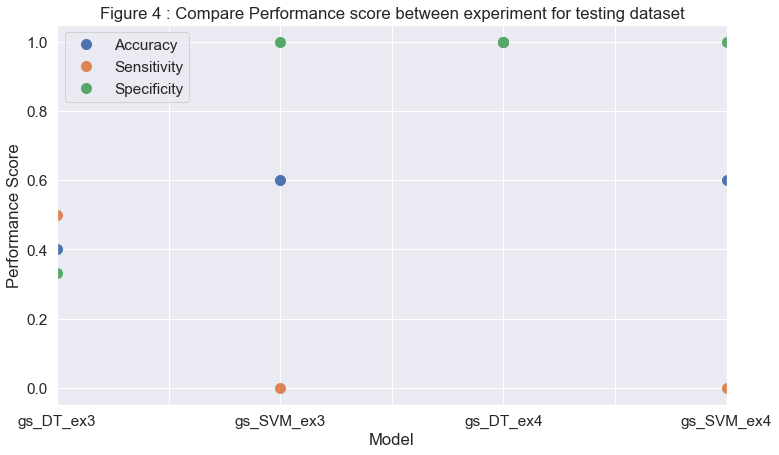

In [32]:
# Figure : Compare Performance score between experiment in each model
title = 'Figure '+str(next(Fignum))+' : Compare Performance score between experiment for testing dataset'
df_plot2 = df_report_all2.copy()
df_plot2.set_index('Model', inplace=True)
ax = df_plot2.loc[:,['Accuracy','Sensitivity','Specificity']].plot(legend=True,figsize= (12,7),grid = True, 
                                               marker='.', markersize=20,
                                               linestyle='none', title = title );

ax.set_ylabel("Performance Score");
figure_list.append(ax.get_figure())
figure_name.append(title)

In [33]:
figure_name

['Figure 1 : Pearson Correlation Matrix for example#3',
 'Figure 2 : Pearson Correlation Matrix for example#4',
 'Figure 3 : Compare Performance score between experiment for training dataset',
 'Figure 4 : Compare Performance score between experiment for testing dataset']

<a id="ch12"></a>
# Conclusion 


Enter number of figure(1-4): 3


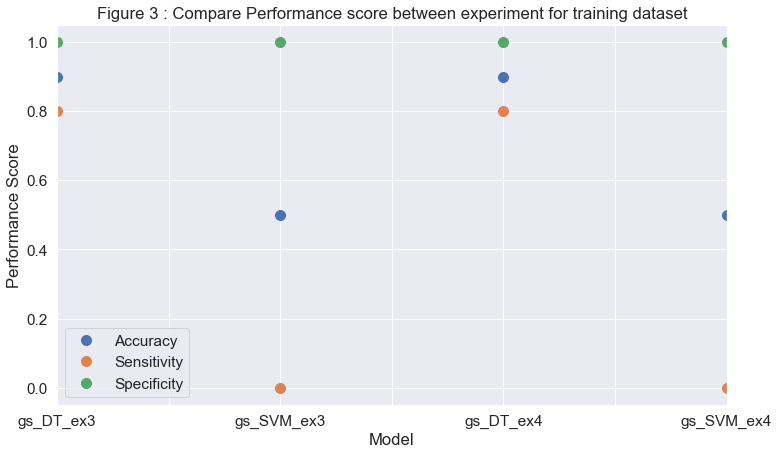

In [35]:
num = int(input('Enter number of figure(1-4): '))
figure_list[num-1]

<p style="text-indent: 2.5em;">
According to Figure 3, the accuracy, sensitivity, and specificity of AdaBoost with a decision tree for example#3 are highest between four experiments for the training dataset. However, according to Figure 4 in a testing dataset, this experiment has accuracy and specificity are less than the other except sensitivity. And the accuracy, sensitivity, and specificity of AdaBoost with a decision tree for example#3 are highest between of four experiments for testing dataset.

<a id="ch90"></a>
# Reference
1. https://blog.statsbot.co/ensemble-learning-d1dcd548e936
- Géron A. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc."; 2017 Mar 13.
- https://slideplayer.com/slide/10465083/
- https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788295758/4/ch04lvl1sec32/adaboost-classifier